In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# 1. Deklarasikan variabel untuk membaca data train
df = pd.read_csv('train.csv')

In [ ]:
# 2. Cek data (apakah bersih atau belum) untuk melakukan data preprosessing sesuai kebutuhan
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# 3 Eksploarasi data dengan statistik
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
df['state'].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [ ]:
df['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
df['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0, 0.5, 'count')

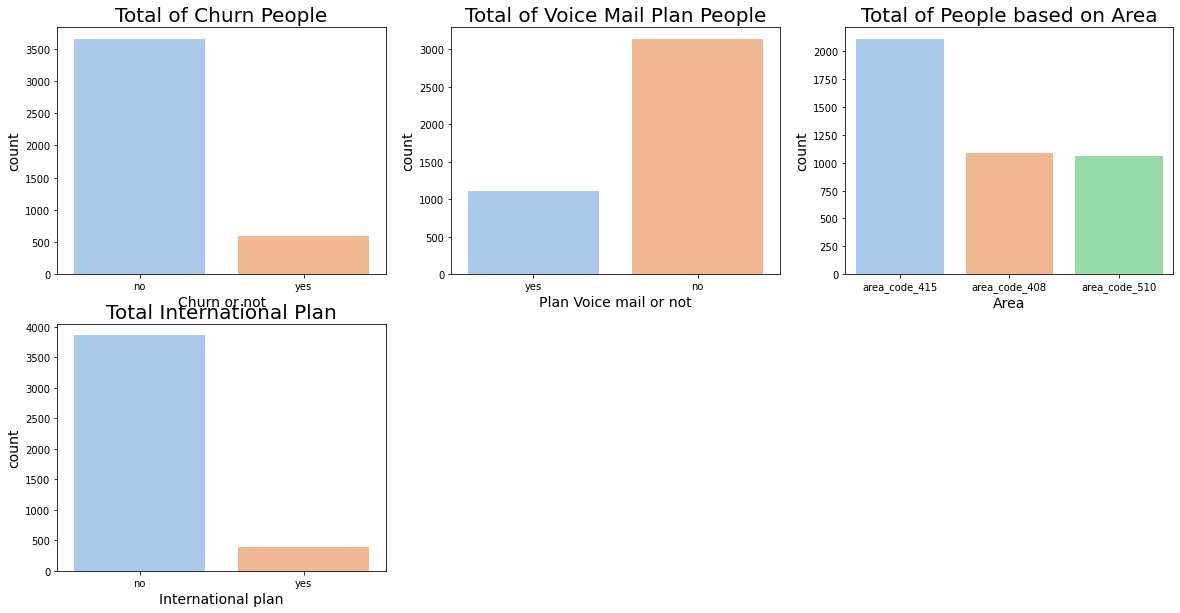

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(2, 3, 1)
sns.countplot(df['churn'], palette = 'pastel')
plt.title('Total of Churn People', fontsize = 20)
plt.xlabel('Churn or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(2, 3, 2)
sns.countplot(df['voice_mail_plan'], palette = 'pastel')
plt.title('Total of Voice Mail Plan People', fontsize = 20)
plt.xlabel('Plan Voice mail or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(2, 3, 3)
sns.countplot(df['area_code'], palette = 'pastel')
plt.title('Total of People based on Area', fontsize = 20)
plt.xlabel('Area', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(2, 3, 4)
sns.countplot(df['international_plan'], palette = 'pastel')
plt.title('Total International Plan', fontsize = 20)
plt.xlabel('International plan', fontsize = 14)
plt.ylabel('count', fontsize = 14)

In [ ]:
import numpy as np

In [ ]:
numeric_data = df.select_dtypes(include=[np.number]).columns
numeric_data

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
numeric_column = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df[numeric_column] = scaler.fit_transform(df[numeric_column])

In [ ]:
print(df[numeric_column].describe().T[['min','max']])

                               min  max
account_length                 0.0  1.0
number_vmail_messages          0.0  1.0
total_day_minutes              0.0  1.0
total_day_calls                0.0  1.0
total_day_charge               0.0  1.0
total_eve_minutes              0.0  1.0
total_eve_calls                0.0  1.0
total_eve_charge               0.0  1.0
total_night_minutes            0.0  1.0
total_night_calls              0.0  1.0
total_night_charge             0.0  1.0
total_intl_minutes             0.0  1.0
total_intl_calls               0.0  1.0
total_intl_charge              0.0  1.0
number_customer_service_calls  0.0  1.0


In [ ]:
categorical_data = df.select_dtypes(exclude=[np.number]).columns
categorical_data

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
df['state'] = LE.fit_transform(df['state'])
print(LE.classes_)
print(np.sort(df['state'].unique()))
print('')

LE = LabelEncoder()
df['area_code'] = LE.fit_transform(df['area_code'])
print(LE.classes_)
print(np.sort(df['area_code'].unique()))
print('')

LE = LabelEncoder()
df['voice_mail_plan'] = LE.fit_transform(df['voice_mail_plan'])
print(LE.classes_)
print(np.sort(df['voice_mail_plan'].unique()))
print('')

LE = LabelEncoder()
df['international_plan'] = LE.fit_transform(df['international_plan'])
print(LE.classes_)
print(np.sort(df['international_plan'].unique()))
print('')

LE = LabelEncoder()
df['churn'] = LE.fit_transform(df['churn'])
print(LE.classes_)
print(np.sort(df['churn'].unique()))
print('')

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]

['area_code_408' 'area_code_415' 'area_code_510']
[0 1 2]

['no' 'yes']
[0 1]

['no' 'yes']
[0 1]

['no' 'yes']
[0 1]



In [ ]:
X = df.drop(['churn'], axis = 1)
y = df['churn']
print("Shape of X", X.shape)
print("Shape of y:", y.shape)

Shape of X (4250, 19)
Shape of y: (4250,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (3400, 19)
Shape of y_train : (3400,)
Shape of X_test : (850, 19)
Shape of y_test : (850,)


ML Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Hasil evaluasi akurasi model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.928235294117647


In [ ]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion matrix:
[[699  36]
 [ 25  90]]


In [ ]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       735
           1       0.71      0.78      0.75       115

    accuracy                           0.93       850
   macro avg       0.84      0.87      0.85       850
weighted avg       0.93      0.93      0.93       850



Karena skor recall dan f1-score kecil pada customer yang churn ('yes') dan skor yang tinggi pada customer yang tidak churn ('no'), maka model cenderung salah dalam mengklasifikasikan customer yang tidak churn ('no')

Hasil data yang dibutuhkan adalah prediksi customer yang churn. Prediksi yang paling dihindari adalah model yang memprediksi customer tidak churn padahal hasil prediksi adalah churn (FN)

ML Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
logreg = LogisticRegression() 
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test)) 

Training Accuracy : 0.8661764705882353
Testing Accuracy : 0.8788235294117647


In [ ]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)


Confusion matrix
[[727   8]
 [ 95  20]]


In [ ]:
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       735
           1       0.71      0.17      0.28       115

    accuracy                           0.88       850
   macro avg       0.80      0.58      0.61       850
weighted avg       0.86      0.88      0.85       850



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [ ]:
print('Training Accuracy :', knn.score(X_train, y_train))  
print('Testing Accuracy :', knn.score(X_test, y_test)) 

Training Accuracy : 0.8720588235294118
Testing Accuracy : 0.8623529411764705


In [ ]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)


Confusion matrix
[[726   9]
 [108   7]]


In [ ]:
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Classification report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.06      0.11       115

    accuracy                           0.86       850
   macro avg       0.65      0.52      0.52       850
weighted avg       0.81      0.86      0.81       850



Implementasi model ke dataset test

In [42]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [43]:
df2 = pd.read_csv('test.csv')

In [44]:
df2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [45]:
df2.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    float64
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    float64
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    float64
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    float64
 12  total_eve_charge               750 non-null    flo

In [46]:
df2[numeric_column] = scaler.fit_transform(df2[numeric_column])

In [48]:
LE = LabelEncoder()
df2['state'] = LE.fit_transform(df2['state'])
print(LE.classes_)
print(np.sort(df2['state'].unique()))
print('')

LE = LabelEncoder()
df2['area_code'] = LE.fit_transform(df2['area_code'])
print(LE.classes_)
print(np.sort(df2['area_code'].unique()))
print('')

LE = LabelEncoder()
df2['voice_mail_plan'] = LE.fit_transform(df2['voice_mail_plan'])
print(LE.classes_)
print(np.sort(df2['voice_mail_plan'].unique()))
print('')

LE = LabelEncoder()
df2['international_plan'] = LE.fit_transform(df2['international_plan'])
print(LE.classes_)
print(np.sort(df2['international_plan'].unique()))
print('')


['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]

['area_code_408' 'area_code_415' 'area_code_510']
[0 1 2]

['no' 'yes']
[0 1]

['no' 'yes']
[0 1]



KeyError: ignored

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    int64  
 2   account_length                 750 non-null    float64
 3   area_code                      750 non-null    int64  
 4   international_plan             750 non-null    int64  
 5   voice_mail_plan                750 non-null    int64  
 6   number_vmail_messages          750 non-null    float64
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    float64
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    float64
 12  total_eve_charge               750 non-null    flo

In [50]:
testing = df2.copy()

In [56]:
X_train.shape

(3400, 19)

In [52]:
testing.shape

(750, 20)

In [57]:
testing.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,2,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,3,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,4,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,5,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000


In [58]:
testing = testing.drop(['id'], axis=1)

In [60]:
testing.shape

(750, 19)

In [61]:
final_pred_dtree = model.predict(testing)
final_pred_LR = logreg.predict(testing)
final_pred_knn = knn.predict(testing)

In [63]:
output_dtree = pd.DataFrame({'id_customer': df2.id, 'churn': final_pred_dtree })
output_LR = pd.DataFrame({'id_customer': df2.id, 'churn': final_pred_LR })
output_knn = pd.DataFrame({'id_customer': df2.id, 'churn': final_pred_knn })

output_dtree.to_csv('result_dtree.csv', index=False)
output_LR.to_csv('result.lr.csv', index=False)
output_knn.to_csv('result_knn.csv', index=False)